# Light visualization test
A place to see how light is visualized across different scenarios all in one place, since visualization doesn't lend itself well to unit tests.

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x (mm)', ylabel='y (mm)', zlabel='z (mm)'>)

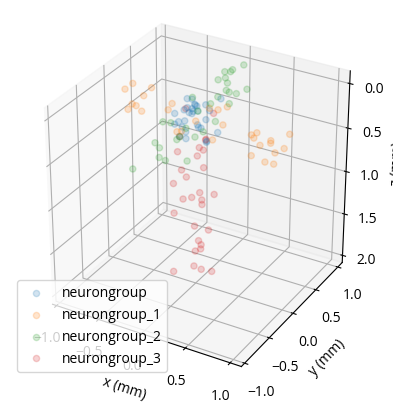

In [1]:
import matplotlib.pyplot as plt
import cleo
from cleo.coords import assign_xyz, assign_coords_rand_rect_prism
from brian2 import NeuronGroup, mm, mV, um, nmeter
xmax_mm = 2
neuron_groups = []
for xlim, ylim, zlim in [
    # ((-10, 10), (-10, 10), (-10, 10)),
    ((-200, 200), (-200, 200), (0, 400)),
    ((-1000, 1000), (-200, 200), (0, 400)),
    ((-200, 200), (-1000, 1000), (0, 400)),
    ((-200, 200), (-200, 200), (0, 2000)),
]:
    ng = NeuronGroup(30, 'v : 1')
    assign_coords_rand_rect_prism(ng, xlim, ylim, zlim, um)
    neuron_groups.append(ng)
cleo.viz.plot(*neuron_groups)


## One-photon (optic fiber)

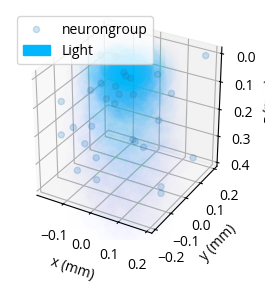

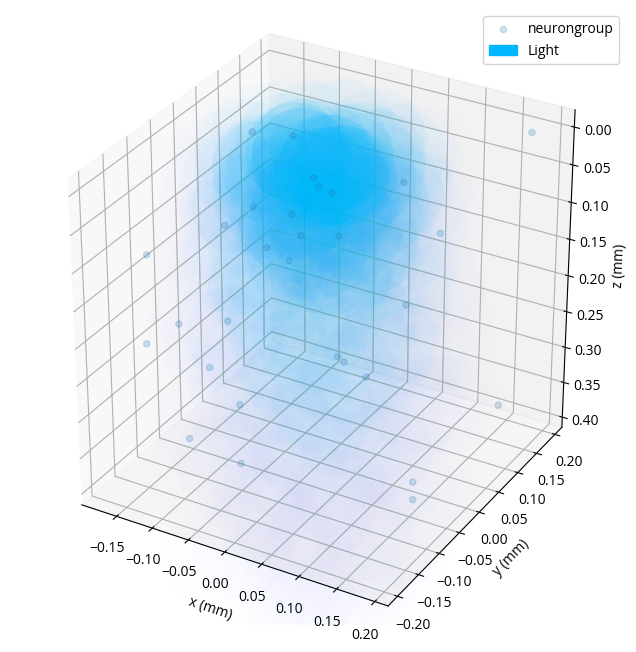

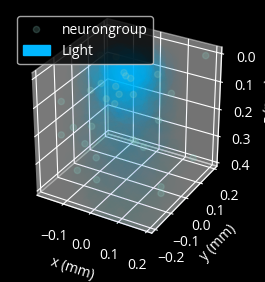

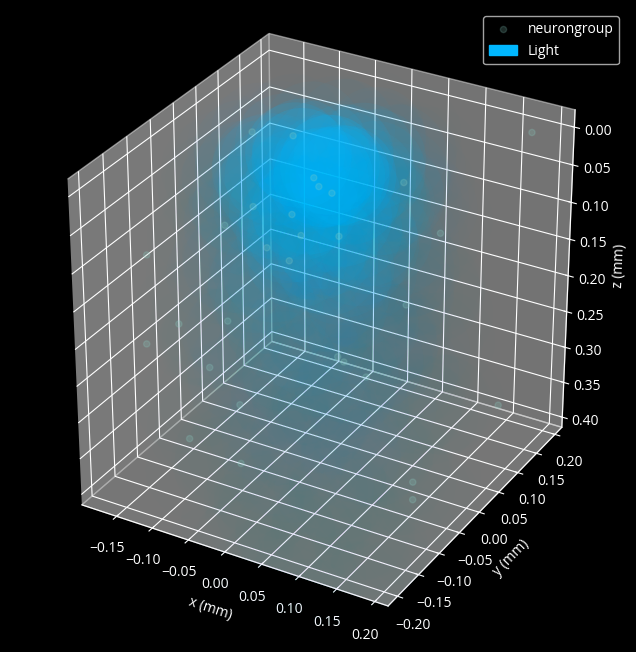

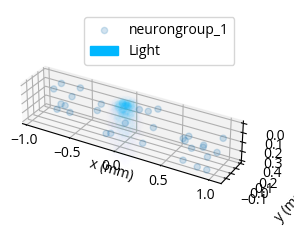

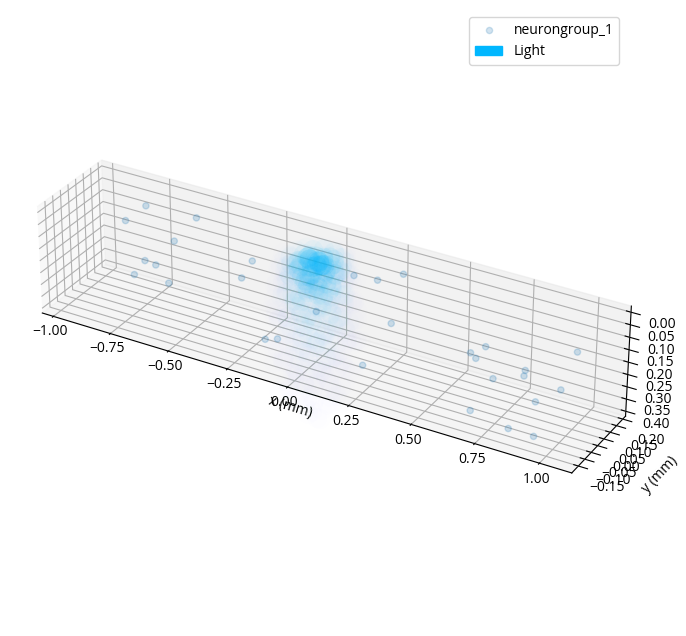

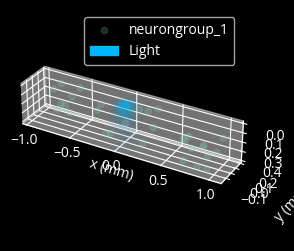

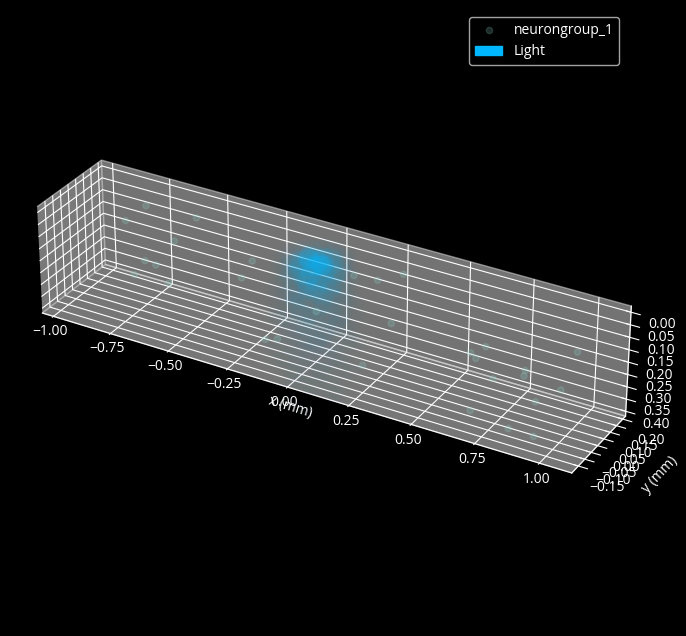

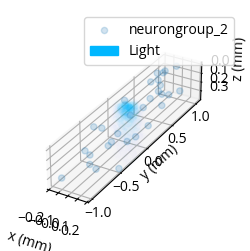

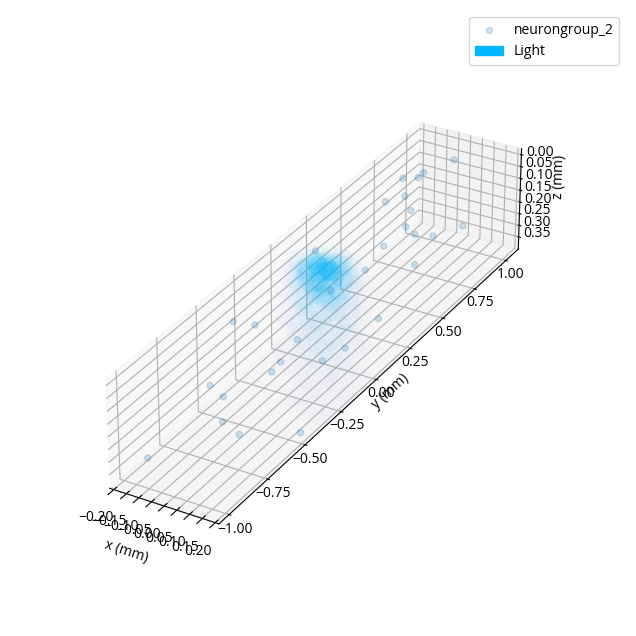

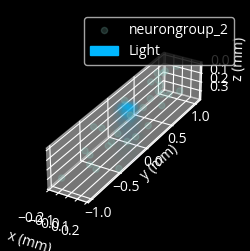

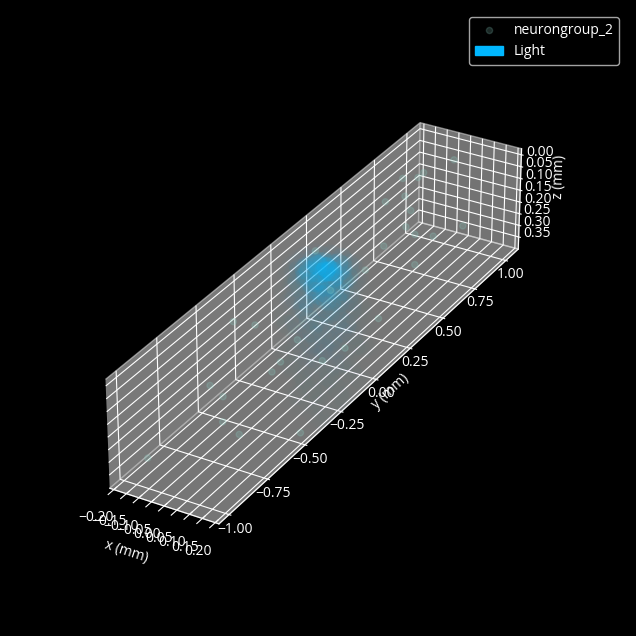

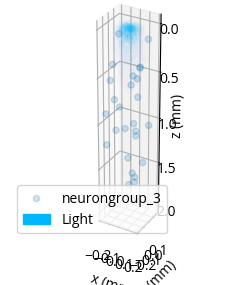

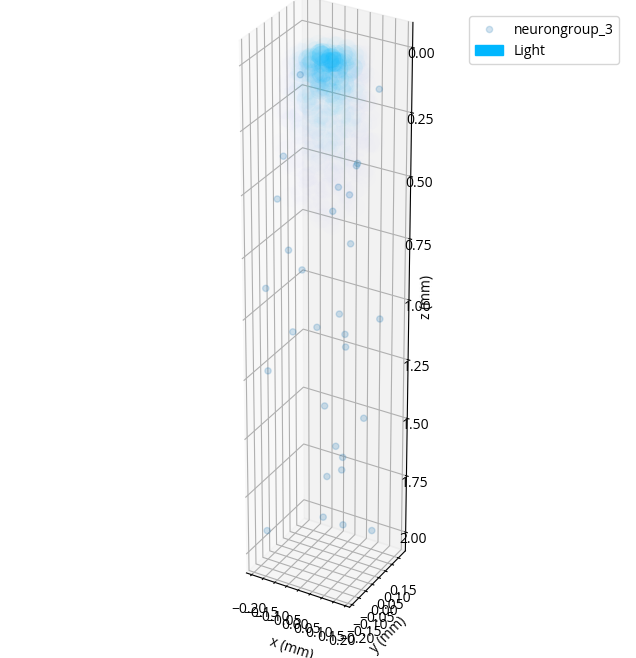

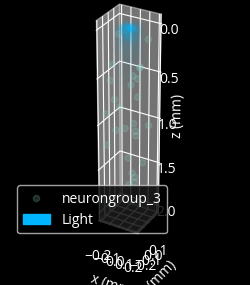

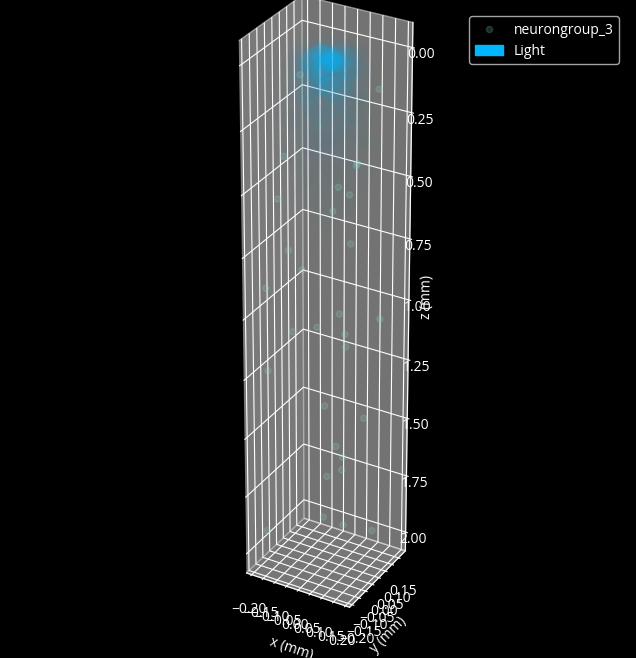

In [2]:
import numpy as np
import cleo
from cleo.light import Light, OpticFiber

fiber = Light(
    light_model=OpticFiber(),
    wavelength=473 * nmeter,
)
for ng in neuron_groups:
    for style in ['default', 'dark_background']:
        for figsize in [(3, 3), (8, 8)]:
            with plt.style.context(style):
                cleo.viz.plot(ng, devices=[fiber], figsize=figsize)

## Two-photon laser

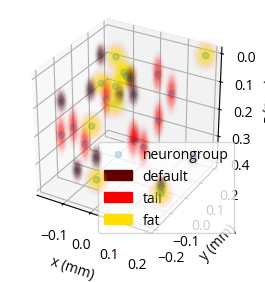

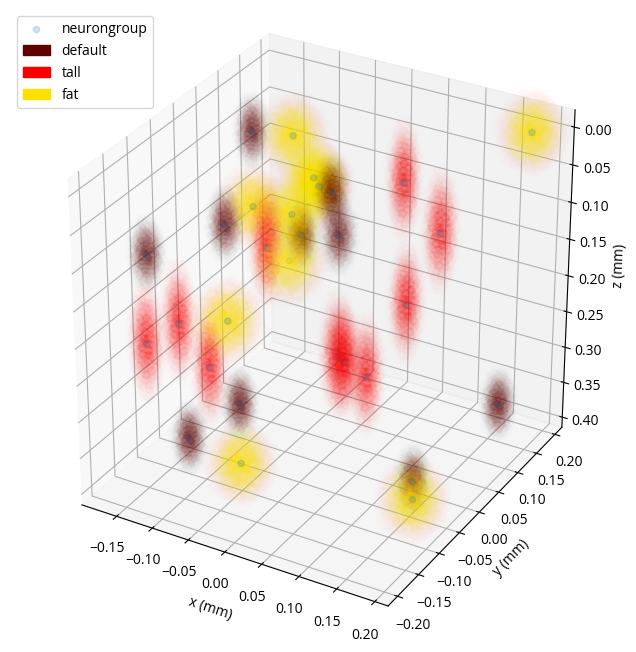

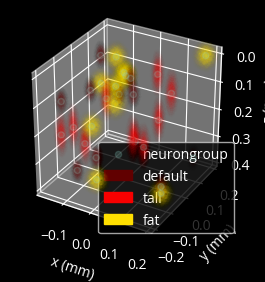

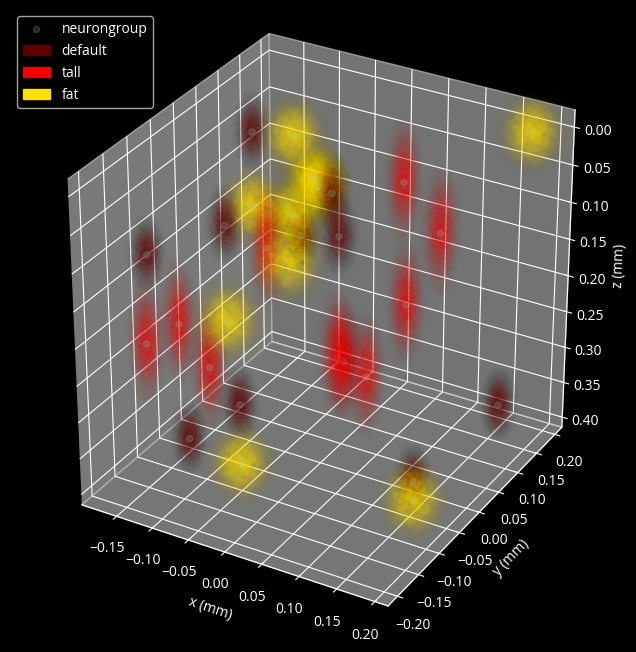

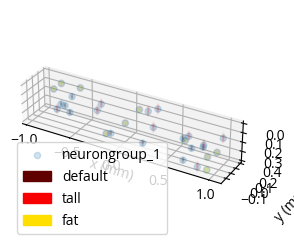

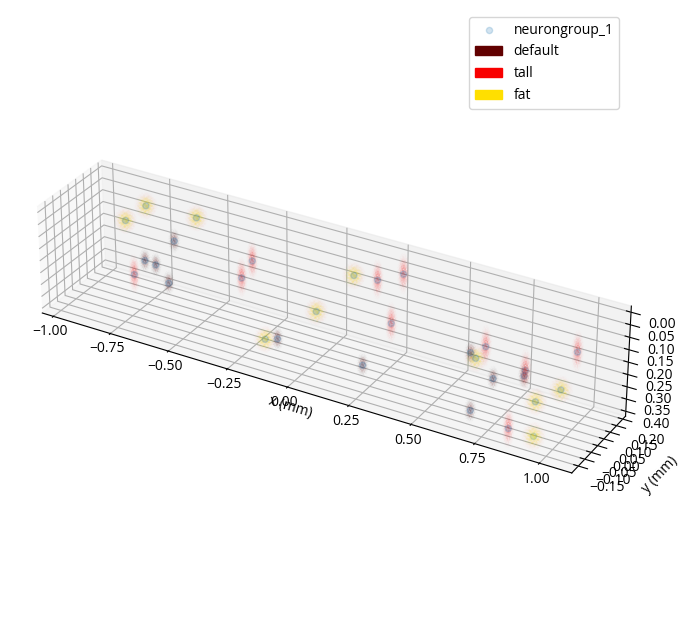

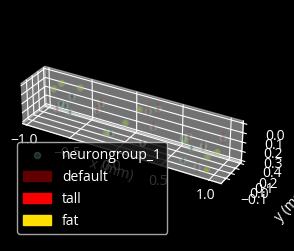

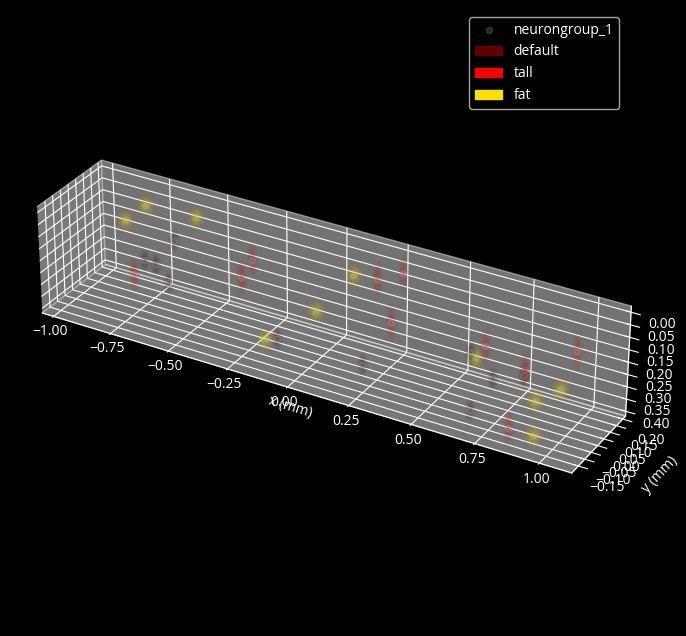

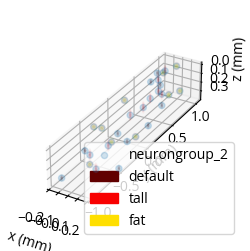

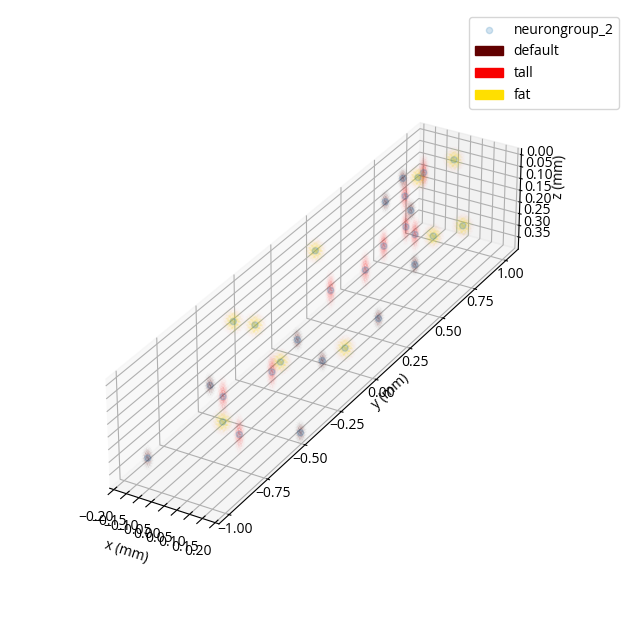

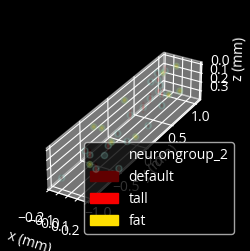

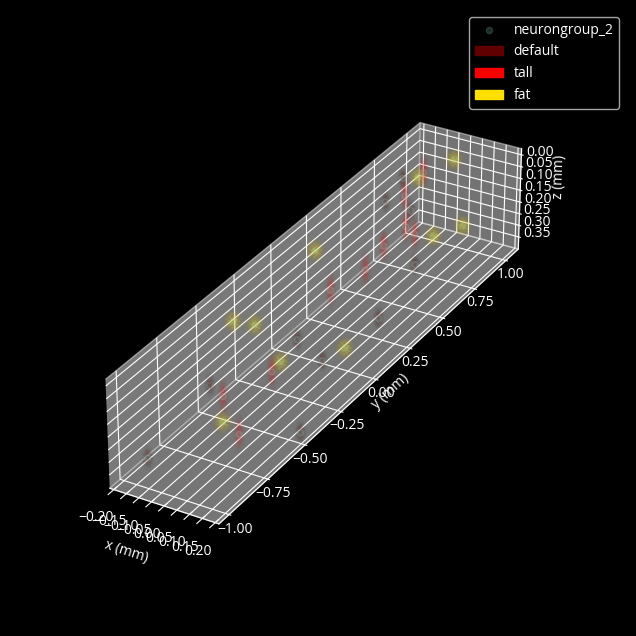

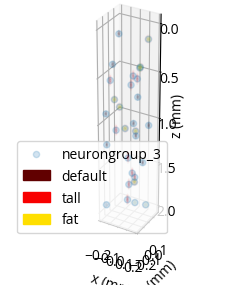

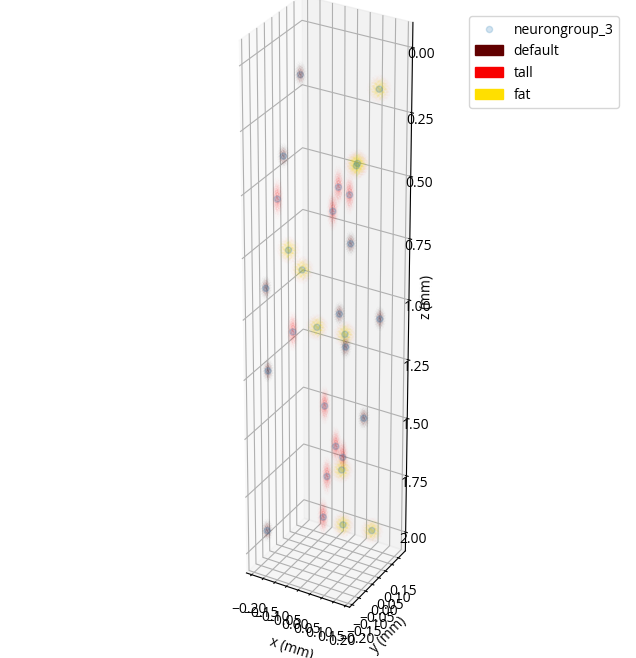

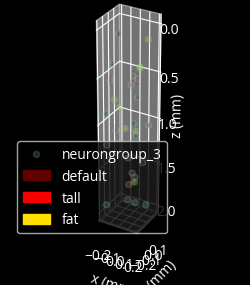

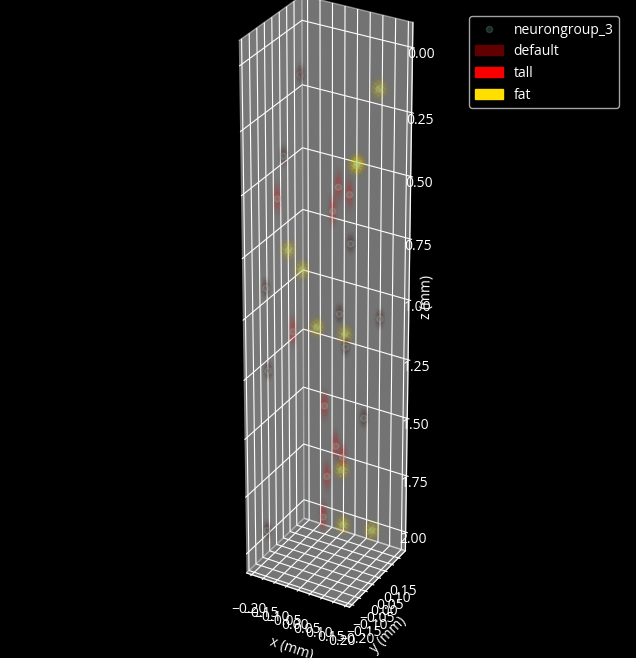

In [3]:
for ng in neuron_groups:
    for style in ['default', 'dark_background']:
        for figsize in [(3, 3), (8, 8)]:
            laser1 = Light(
                coords=cleo.coords.coords_from_ng(ng)[0:10],
                light_model=cleo.light.GaussianEllipsoid(),
                wavelength=1060 * nmeter,
                name='default',
            )
            laser2 = Light(
                coords=cleo.coords.coords_from_ng(ng)[10:20],
                light_model=cleo.light.GaussianEllipsoid(sigma_axial=30*um),
                wavelength=650 * nmeter,
                name='tall',
            )
            laser3 = Light(
                coords=cleo.coords.coords_from_ng(ng)[20:30],
                light_model=cleo.light.GaussianEllipsoid(sigma_lateral=15*um),
                wavelength=590 * nmeter,
                name='fat',
            )
            with plt.style.context(style):
                cleo.viz.plot(ng, devices=[laser1, laser2, laser3], figsize=figsize)